# Step 1: Bussiness Problem Understanding

### ●  Indetify the relationship between total advertising spend and sales ? 
### ●  Our next ad campaign will have a total spend of 200,000 ,how many units do we expect to sell as a result of this?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2 : Data Understanding
### 2.1 : Data Collection

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   Radio      200 non-null    int64
 2   Newspaper  200 non-null    int64
 3   Sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### If someone wants to spend a total_amount of 200,000 ,what would be the expected sales?
####  ● Here we need to find the total_sales by combining Tv Radio and newspaper

In [4]:
df['total_spend'] = df['TV'] + df['Radio'] + df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df.drop(columns=['TV','Radio','Newspaper'],inplace=True)
df.head()

,Sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# Step 3: Data Preprocessing
### 3.1 :  Exploratory Data Analysis(EDA)
        On the basis of this data, how should you spend the advertising money in future? These general question might leads you to more specific questions :
        1: Is there any relashionship between ads and sales?
        2: How strong is that relashionship?
        3: Given ad spending, can sales be predicted? 

In [6]:
df.describe()

,Sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.495000
std,5217.456566,92985.173284
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


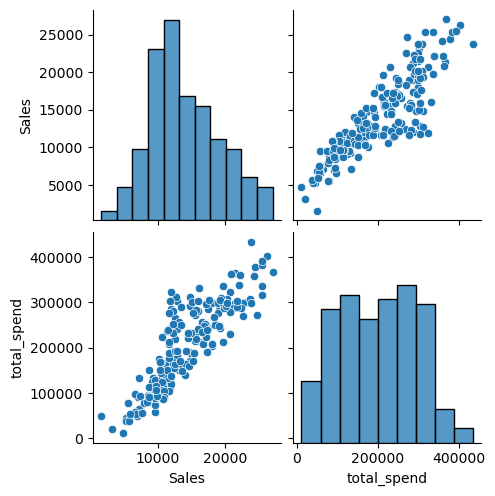

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
# Here we can colclude that sales and total_spend having a very good correlation as
# all the data points are very close to each e=other

In [9]:
df.corr()

,Sales,total_spend
Sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [10]:
# They are having a good correlation

### 3.2:  Data Cleaning 

In [11]:
df.isna().sum()

Sales          0
total_spend    0
dtype: int64

### 3.3 Data Wrangling

In [12]:
# No data Wrangling required

### 3.4 Train-Test-Split

In [13]:
# X and y

X = df[['total_spend']]
y = df.Sales

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Step 4: Modelling

In [15]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
#intercept
model.intercept_

4199.10650086872

In [17]:
# coefficient
model.coef_

array([0.04895385])

In [18]:
# Now our model equation looks like
#  sales_pred = 4199.1 + 0.048(total_spend)

### Predictions

In [19]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Step 5:  Evaluation

In [20]:
from sklearn.metrics import r2_score
print('R2 Score of Train Data is : ', r2_score(y_train,train_predictions))
print('R2 Score of Test Data is : ', r2_score(y_test,test_predictions))

R2 Score of Train Data is :  0.7404192834391545
R2 Score of Test Data is :  0.7650263029606331


In [21]:
# Here we dont have any Overfitting or Underfitting problem 

In [22]:
# Test R-square

In [23]:
model.score(X_test,y_test)

0.7650263029606331

In [24]:
#Train R-Square

In [25]:
model.score(X_train,y_train)

0.7404192834391545

# Checklist
      ● 1.  Check whether the model has overfitting or underfitting problem
      ● 2.  Is test accuracy = cross validation score
      ● 4.  Check model meets the bussiness problem requirements
      ● 5.  Finally save the model and share to the deployment team

### For Linear Regression we have an addition checklist point
      ● 3. Check Assumptions (If it is linear)

### 1. Linearity Of Errors

In [26]:
test_residuals = y_test - test_predictions

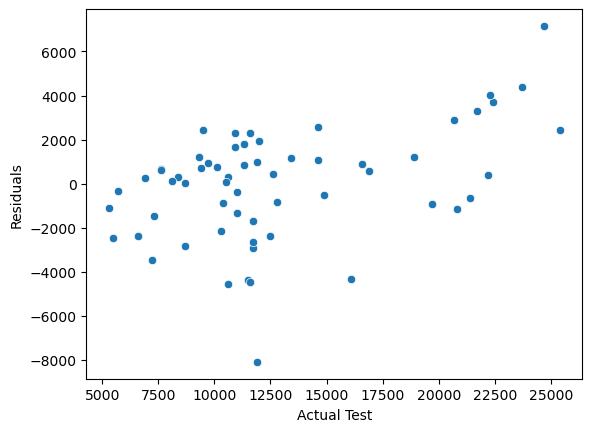

In [27]:
sns.scatterplot(x = y_test,y = test_residuals)
plt.xlabel('Actual Test')
plt.ylabel('Residuals')
plt.show()

### 2. Normality of Errors

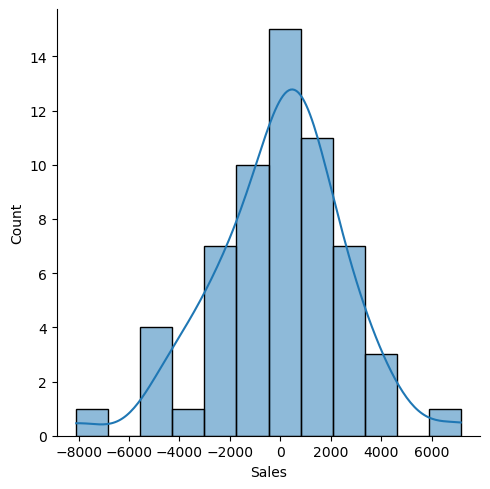

In [28]:
sns.displot(test_residuals,kde=True)
plt.show()

### 3. Equal Variance Of Errors (Homoscadasticity)

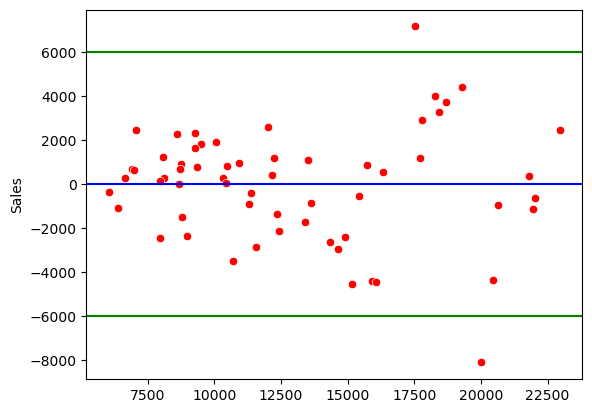

In [38]:
sns.scatterplot(x = test_predictions,y = test_residuals,color='r')
plt.axhline(y=0,color='b')
plt.axhline(y=6000,color='g')
plt.axhline(y=-6000,color='g')


plt.show()

### 4. Variable Significance

In [40]:
import statsmodels.formula.api as smf
model2 = smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.06e-62
Time:                        22:55:02   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0276    438.525      9.676      0.000    3378.248    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 6: Final Inferences
### Our next ad campaign will have a total spend of 200k ,how many units do we expect to sell as the result of this?


In [44]:
model.predict([[200000]])

C:\Users\Deepak Mehta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])

# SAVE A MODEL

In [45]:
from joblib import dump

dump(model,'sales_model.joblib')

['sales_model.joblib']

# LOAD THE MODEL

In [47]:
from joblib import load

loaded_model = load('sales_model.joblib')

In [48]:
loaded_model.predict([[200000]])

C:\Users\Deepak Mehta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])